In [19]:
import os 
import pandas as pd 
import seaborn as sns 
import scipy 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import metrics
import numpy as np 

In [3]:
df = pd.read_csv("data/boston.csv")
df.shape

(506, 14)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

<AxesSubplot: >

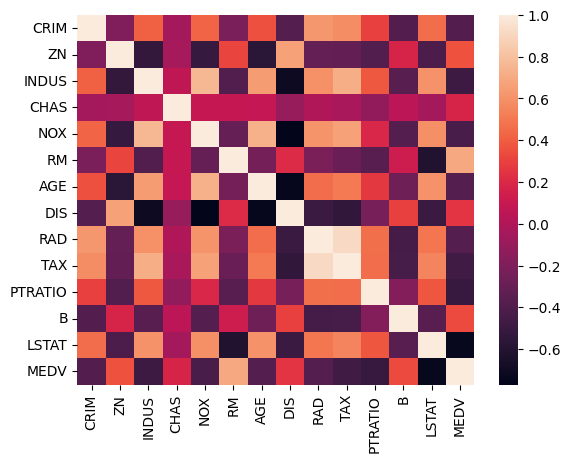

In [23]:
sns.heatmap(df.corr())

In [9]:
df_input = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

In [10]:
df_output = df['MEDV']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_input, df_output,test_size=0.2)

In [17]:
lr=linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
y_test_pred = lr.predict(X_test)

In [20]:
print('MAE:',metrics.mean_absolute_error(y_test,y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('R_squred:',metrics.r2_score(y_test,y_test_pred))

MAE: 3.8972321320819687
RMSE: 5.995021990057228
R_squred: 0.6733967786917829


In [27]:
lr.coef_, lr.intercept_

(array([-8.69529479e-02,  3.15286456e-02,  1.29669994e-02,  1.41892241e+00,
        -1.54965891e+01,  4.02563390e+00, -3.42232321e-03, -1.29998064e+00,
         3.15720913e-01, -1.44996754e-02, -9.47765621e-01,  8.97524594e-03,
        -4.73247661e-01]),
 33.732977256171594)

In [24]:
y_residual = y_test - y_test_pred

<AxesSubplot: ylabel='MEDV'>

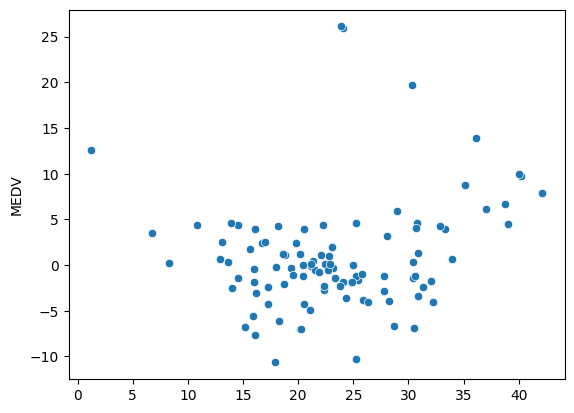

In [25]:
sns.scatterplot(x=y_test_pred,y=y_residual)

<AxesSubplot: xlabel='MEDV', ylabel='Density'>

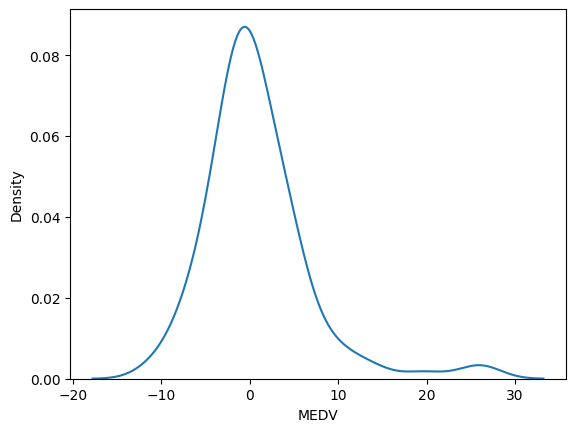

In [28]:
sns.kdeplot(y_residual)

### SUBSET REGRESSION

In [29]:
df_input_sub = df[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'TAX',
       'PTRATIO', 'LSTAT']]
df_output_sub = df['MEDV']

In [31]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(df_input_sub,df_output_sub,test_size=0.2)

In [37]:
lr_sub=linear_model.LinearRegression()
lr_sub.fit(X_train_sub, y_train_sub)

LinearRegression()

In [38]:
y_test_pred_sub = lr_sub.predict(X_test_sub)

In [39]:
print('MAE:',metrics.mean_absolute_error(y_test_sub,y_test_pred_sub))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_sub,y_test_pred_sub)))
print('R_squred:',metrics.r2_score(y_test_sub,y_test_pred_sub))

MAE: 3.6204036480429673
RMSE: 4.615189899844096
R_squred: 0.7505498511599175
